1) Problem Statement

How students performance is affected by other variables such as Gender,Ethnicity,Parental level of education, Lunch and Test preparation course.

2) Data Collection

Import Pandas,Numpy,seaborn,Maplotlib and warnings libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

Dataset Information

-> Gender:(Male,Female)
-> Race/Ethnicity:(A,B,C,D,E)
-> Parental level of education: parent's final education(bachelors,masters,associates degree, high school, some college degree)
-> Lunch:having lunch before the test(standard or free/reduced)
-> test preparation course: complete or not complete before test
-> Math score, Reading score , Writing score

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the dataset

In [7]:
df.duplicated().sum()

0

there is no duplicate values in the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking no of unique values in each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Statistics of dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observations:
1) All means of numerical data are very close to each other
2) Standard deviation of the data are very close to each other
3) minimum score for maths is 0 on the other hand minimum scores of reading and writing are 17 and 10

In [11]:
# categorical features
categorical_features=[features for features in df.columns if df[features].dtypes=='O']
print('The categorical features are {}'.format(categorical_features))
print('We have {} categorical features'.format(len(categorical_features)))

The categorical features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
We have 5 categorical features


In [12]:
## unique values in categorical features
for features in categorical_features:
    print('The unique values in',features,'are :',df[features].unique())
    print(" ")

The unique values in gender are : ['female' 'male']
 
The unique values in race_ethnicity are : ['group B' 'group C' 'group A' 'group D' 'group E']
 
The unique values in parental_level_of_education are : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
 
The unique values in lunch are : ['standard' 'free/reduced']
 
The unique values in test_preparation_course are : ['none' 'completed']
 


In [13]:
### total numerical features
numerical_features=[features for features in df.columns if df[features].dtypes!='O']
print('The numerical features are {}'.format(numerical_features))
print('We have {} numerical features'.format(len(numerical_features)))

The numerical features are ['math_score', 'reading_score', 'writing_score']
We have 3 numerical features


Adding columns Like "TOTAL SCORE" AND "AVERAGE"

In [14]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average_score']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
math_full_scored_students=df[df['math_score']==100]['average_score'].count()
reading_full_scored_students=df[df['reading_score']==100]['average_score'].count()
writing_full_scored_students=df[df['writing_score']==100]['average_score'].count()

print(f" Number of students who scored full marks in math are: {math_full_scored_students}")
print(f" Number of students who scored full marks in reading are: {reading_full_scored_students}")
print(f" Number of students who scored full marks in writing are: {writing_full_scored_students}")

 Number of students who scored full marks in math are: 7
 Number of students who scored full marks in reading are: 17
 Number of students who scored full marks in writing are: 14


Let's consider the pass percentage greater than 20 it states 20 marks are pass marks 
Let's find how many students are failed

In [16]:
total_students_failed_in_math=df[df['math_score']<20]['average_score'].count()
total_students_failed_in_reading=df[df['reading_score']<20]['average_score'].count()
total_students_failed_in_writing=df[df['writing_score']<20]['average_score'].count()

print(f" Number of students who failed in math are: {total_students_failed_in_math}")
print(f" Number of students who failed in reading are: {total_students_failed_in_reading}")
print(f" Number of students who failed in writing are: {total_students_failed_in_writing}")

 Number of students who failed in math are: 4
 Number of students who failed in reading are: 1
 Number of students who failed in writing are: 3


Observations:
By the observation of the data most students are performing well in reading
The performance of students in maths are not good enough

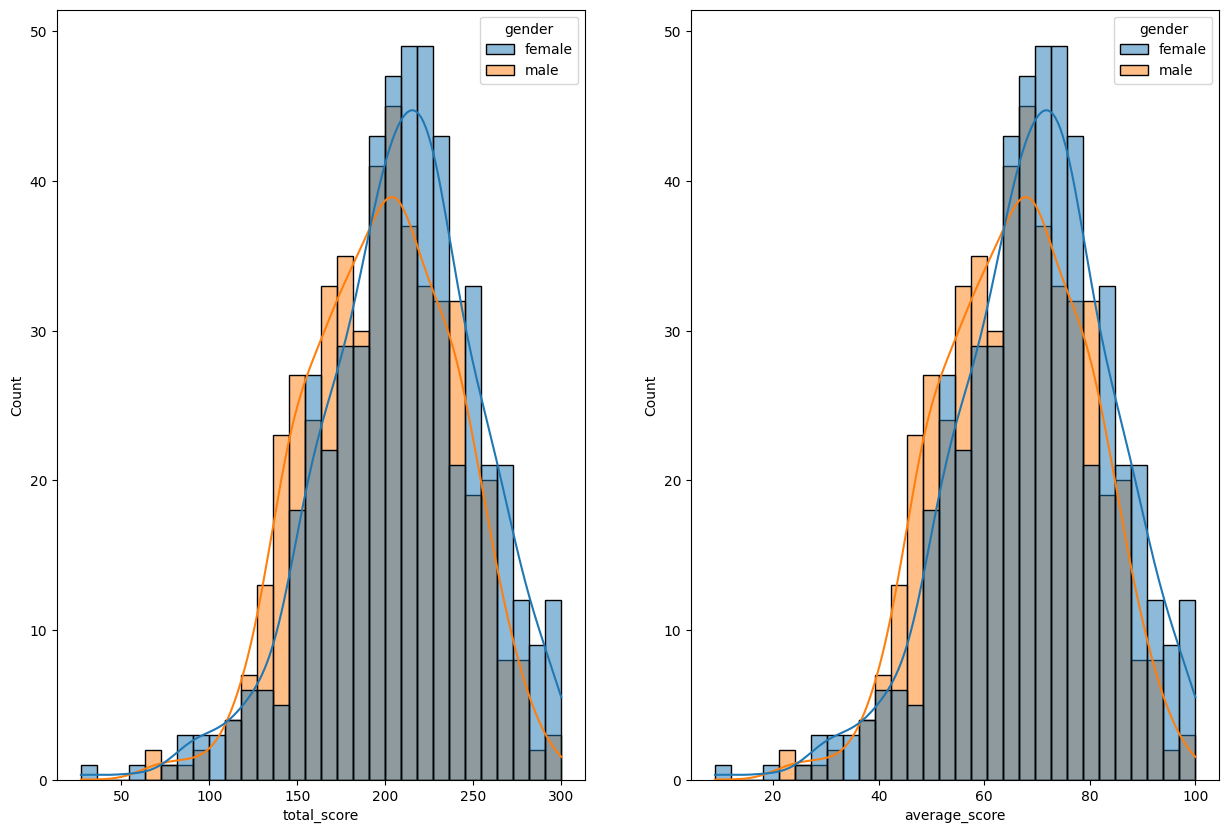

In [17]:
## Histogram of average score
fig,axs=plt.subplots(1,2,figsize=(15,10))
plt.subplot(121)
sns.histplot(data=df,x='total_score',kde=True,bins=30,color='g',hue='gender')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,bins=30,color='r',hue='gender')
plt.show()

Female students are performing better than male students

<Axes: title={'center': 'Average score based on test_preparation_course of female'}, xlabel='average_score', ylabel='Count'>

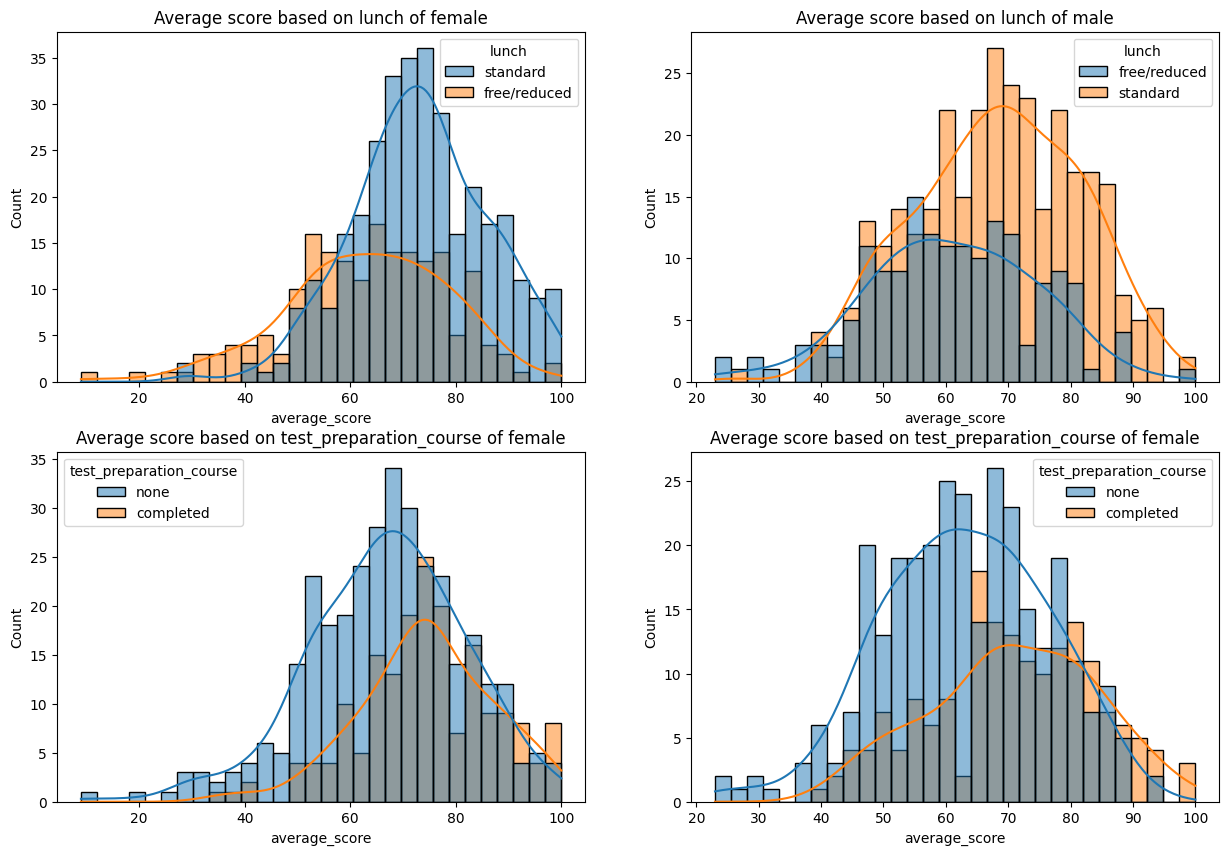

In [18]:
fig,axs=plt.subplots(2,2,figsize=(15,10))
plt.subplot(221)
plt.title('Average score based on lunch of female')
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,bins=30,color='g',hue='lunch')
plt.subplot(222)
plt.title('Average score based on lunch of male')
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,bins=30,color='r',hue='lunch')
plt.subplot(223)
plt.title('Average score based on test_preparation_course of female')
sns.histplot(data=df[df['gender']=='female'],x='average_score',kde=True,bins=30,color='g',hue='test_preparation_course')
plt.subplot(224)
plt.title('Average score based on test_preparation_course of female')
sns.histplot(data=df[df['gender']=='male'],x='average_score',kde=True,bins=30,color='r',hue='test_preparation_course')

<Axes: title={'center': 'Average score of females students based on race/ethnicity'}, xlabel='average_score', ylabel='Count'>

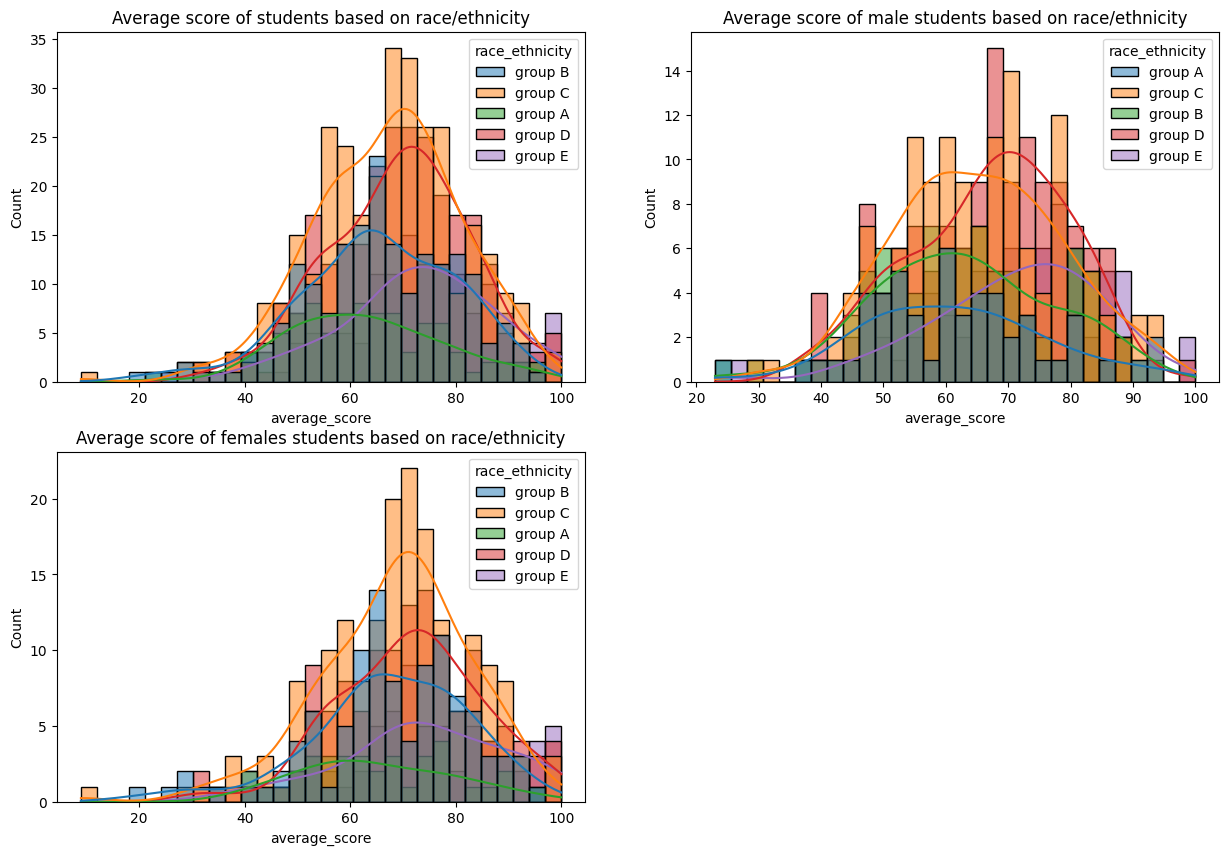

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title('Average score of students based on race/ethnicity')
sns.histplot(data=df,x='average_score',color='g',hue='race_ethnicity',bins=30,kde=True)
plt.subplot(222)
plt.title('Average score of male students based on race/ethnicity')
sns.histplot(data=df[df['gender']=='male'],x='average_score',color='r',bins=30,kde=True,hue='race_ethnicity')
plt.subplot(223)
plt.title('Average score of females students based on race/ethnicity')
sns.histplot(data=df[df['gender']=='female'],x='average_score',color='b',kde=True,bins=30,hue='race_ethnicity')

Observations:

1) In male students and female students group c and group D performed well and the least performed students belong to group A


<Axes: xlabel='average_score', ylabel='Count'>

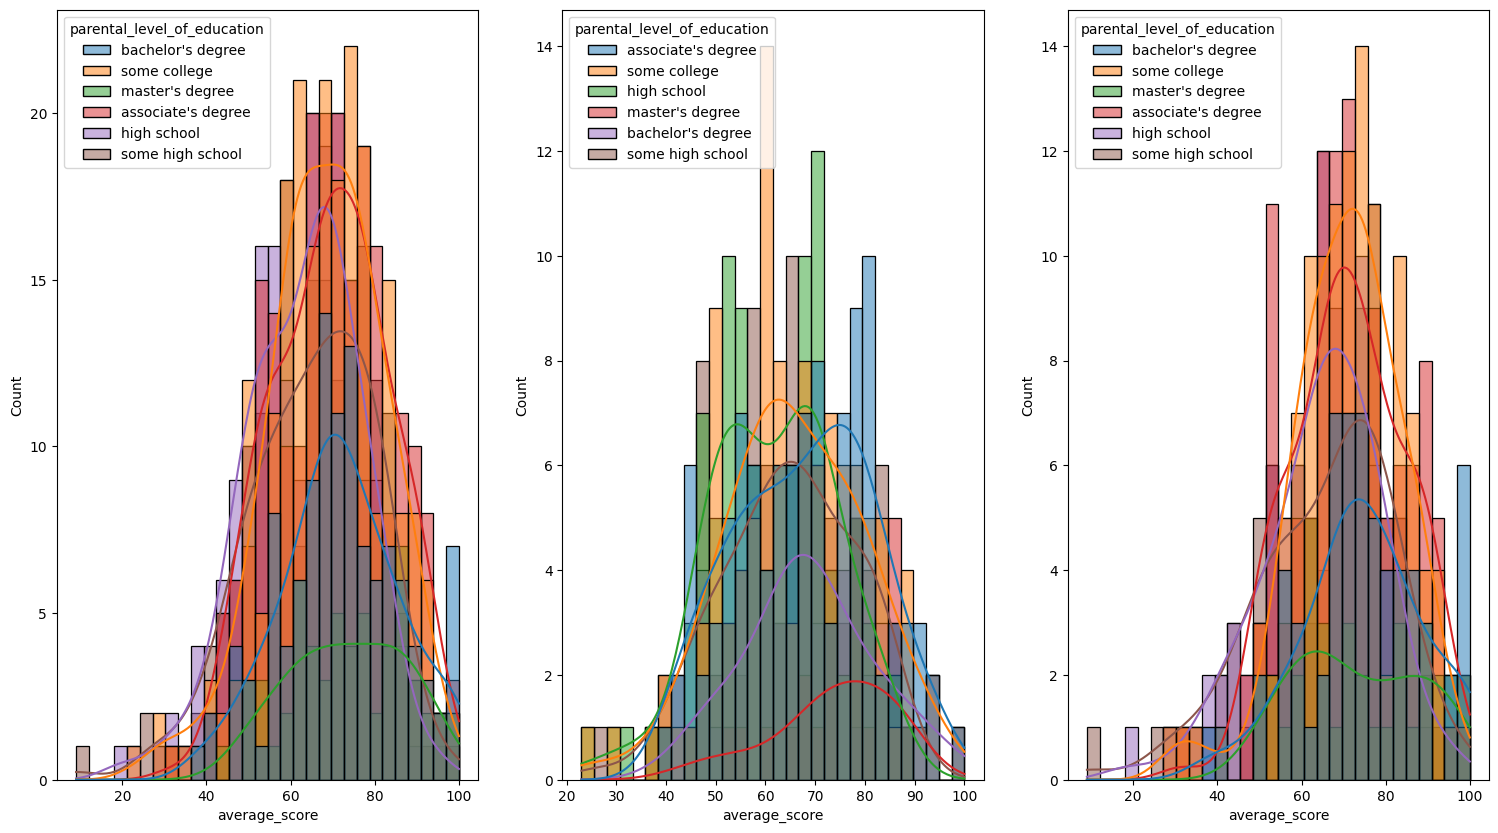

In [32]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(141)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average_score',bins=30,kde=True,hue='parental_level_of_education')

Parental level of education not really helping in education most of the times 